![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_stock_market.ipynb)


# Training a Sentiment Analysis Classifier with NLU
## 2 Class Demo  Stock Market Sentiment Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:


<br>


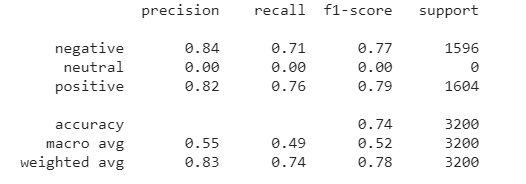




You can achieve these results or even better on this dataset with test  data:


<br>

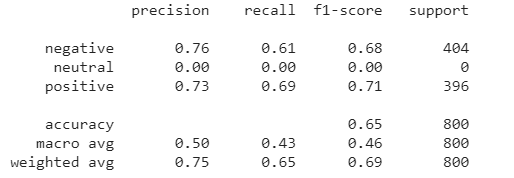


# 1. Install Java 8 and NLU

In [ ]:
!pip install -q johnsnowlabs


# 2. Download Stock Market  Sentiment dataset
https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
#Context

Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative and positive.

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/stock_data/stock_data.csv


In [4]:
import pandas as pd
train_path = '/content/stock_data.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
train_df.y = train_df.y.astype(str)
train_df.y = train_df.y.str.replace('-1','negative')
train_df.y = train_df.y.str.replace('1','positive')
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
3971,"Taking profits on CMG from 321, not time to a ...",positive
4113,"STI 5 min 1 - and 30 min opening range, added ...",positive
1878,ong EN with stop arnd 39.40- entry 40.10,positive
3270,Adding short BWS to portfolio. I think next ye...,negative
5073,The banks for years rode consumer spending and...,negative
...,...,...
5591,"Sensex, Nifty End Mixed Despite RBI's Steep Re...",negative
2338,ZNGA Merrill upgraded this on 2/5 - just a ret...,negative
984,AMAT reached very high overbought conditions. ...,positive
2883,GOOG reminds me so much of AAP in Sept bounci...,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [6]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


/usr/local/lib/python3.10/dist-packages/nlu/pipe/pipeline.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.y = dataset.y.apply(str)
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origin_index'] = data.index
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        17
    positive       0.66      1.00      0.80        33

    accuracy                           0.66        50
   macro avg       0.33      0.50      0.40        50
weighted avg       0.44      0.66      0.52        50



/usr/local/lib/python3.10/dist-packages/nlu/pipe/extractors/extractor_methods/base_extractor_methods.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_explode] = df[cols_to_explode].apply(pad_same_level_cols, axis=1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,"Taking profits on CMG from 321, not time to a ...","[-1.1575689315795898, 0.2715361416339874, -0.2...",positive,3.0,"Taking profits on CMG from 321, not time to a ...",positive
1,"STI 5 min 1 - and 30 min opening range, added ...","[-1.3090834617614746, -0.1740988940000534, -0....",positive,3.0,"STI 5 min 1 - and 30 min opening range, added ...",positive
2,ong EN with stop arnd 39.40- entry 40.10,"[-1.189386248588562, 0.4811112582683563, -0.66...",positive,2.0,ong EN with stop arnd 39.40- entry 40.10,positive
3,Adding short BWS to portfolio. I think next ye...,"[-0.6736384630203247, 0.7296571731567383, -0.1...",positive,8.0,Adding short BWS to portfolio. I think next ye...,negative
4,The banks for years rode consumer spending and...,"[-0.3878522217273712, 0.5501695275306702, -0.0...",positive,6.0,The banks for years rode consumer spending and...,negative
5,of some of the most watched biotechs AMGN look...,"[-0.31379231810569763, 0.5748125910758972, -0....",positive,3.0,of some of the most watched biotechs AMGN look...,positive
6,GOOG here is the leader of the pack for the ri...,"[-0.5645806193351746, 0.6001827716827393, 0.08...",positive,7.0,GOOG here is the leader of the pack for the ri...,negative
7,user another good read. keep em coming and tha...,"[-1.0190978050231934, 0.7494890093803406, 0.07...",positive,5.0,user another good read. keep em coming and tha...,negative
8,"GTXI long 5.16, will take early assuming no ga...","[-0.2726511061191559, 0.32721856236457825, -0....",positive,1.0,"GTXI long 5.16, will take early assuming no ga...",positive
9,"Sen. Kelly Loeffler and her husband, New York ...","[-0.28392985463142395, 1.012831449508667, -0.0...",positive,1.0,"Sen. Kelly Loeffler and her husband, New York ...",positive


# 4. Test the fitted pipe on new example

In [7]:
fitted_pipe.predict("Bitcoin dropped by 50 percent!")

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,Bitcoin dropped by 50 percent!,"[-1.7797279357910156, 0.3090762495994568, -0.2...",positive,1.0


## 5.  Configure pipe training parameters

In [8]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

## 6. Retrain with new parameters

In [9]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


/usr/local/lib/python3.10/dist-packages/nlu/pipe/pipeline.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.y = dataset.y.apply(str)
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origin_index'] = data.index
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        17
    positive       0.66      1.00      0.80        33

    accuracy                           0.66        50
   macro avg       0.33      0.50      0.40        50
weighted avg       0.44      0.66      0.52        50



/usr/local/lib/python3.10/dist-packages/nlu/pipe/extractors/extractor_methods/base_extractor_methods.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_explode] = df[cols_to_explode].apply(pad_same_level_cols, axis=1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,"Taking profits on CMG from 321, not time to a ...","[-1.1575689315795898, 0.2715361416339874, -0.2...",positive,4.0,"Taking profits on CMG from 321, not time to a ...",positive
1,"STI 5 min 1 - and 30 min opening range, added ...","[-1.3090834617614746, -0.1740988940000534, -0....",positive,7.0,"STI 5 min 1 - and 30 min opening range, added ...",positive
2,ong EN with stop arnd 39.40- entry 40.10,"[-1.189386248588562, 0.4811112582683563, -0.66...",positive,4.0,ong EN with stop arnd 39.40- entry 40.10,positive
3,Adding short BWS to portfolio. I think next ye...,"[-0.6736384630203247, 0.7296571731567383, -0.1...",positive,7.0,Adding short BWS to portfolio. I think next ye...,negative
4,The banks for years rode consumer spending and...,"[-0.3878522217273712, 0.5501695275306702, -0.0...",positive,4.0,The banks for years rode consumer spending and...,negative
5,of some of the most watched biotechs AMGN look...,"[-0.31379231810569763, 0.5748125910758972, -0....",positive,1.0,of some of the most watched biotechs AMGN look...,positive
6,GOOG here is the leader of the pack for the ri...,"[-0.5645806193351746, 0.6001827716827393, 0.08...",positive,5.0,GOOG here is the leader of the pack for the ri...,negative
7,user another good read. keep em coming and tha...,"[-1.0190978050231934, 0.7494890093803406, 0.07...",positive,1.0,user another good read. keep em coming and tha...,negative
8,"GTXI long 5.16, will take early assuming no ga...","[-0.2726511061191559, 0.32721856236457825, -0....",positive,7.0,"GTXI long 5.16, will take early assuming no ga...",positive
9,"Sen. Kelly Loeffler and her husband, New York ...","[-0.28392985463142395, 1.012831449508667, -0.0...",positive,1.0,"Sen. Kelly Loeffler and her husband, New York ...",positive


# 7. Try training with different Embeddings

In [10]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [12]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]


/usr/local/lib/python3.10/dist-packages/nlu/pipe/extractors/extractor_methods/base_extractor_methods.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_explode] = df[cols_to_explode].apply(pad_same_level_cols, axis=1)


              precision    recall  f1-score   support

    negative       0.79      0.54      0.64      1671
     neutral       0.00      0.00      0.00         0
    positive       0.82      0.86      0.84      2961

    accuracy                           0.74      4632
   macro avg       0.54      0.46      0.49      4632
weighted avg       0.81      0.74      0.76      4632



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7.1 evaluate on Test Data

In [13]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.69      0.45      0.54       435
     neutral       0.00      0.00      0.00         0
    positive       0.76      0.80      0.78       724

    accuracy                           0.67      1159
   macro avg       0.48      0.41      0.44      1159
weighted avg       0.73      0.67      0.69      1159



/usr/local/lib/python3.10/dist-packages/nlu/pipe/extractors/extractor_methods/base_extractor_methods.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_explode] = df[cols_to_explode].apply(pad_same_level_cols, axis=1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramet

# 8. Lets save the model

In [14]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [15]:
hdd_pipe = nlp.load(path="./models/classifier_dl_trained")

preds = hdd_pipe.predict('Bitcoin dropped by 50 percent!!')
preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,Bitcoin dropped by 50 percent!!,"[0.20597122609615326, 0.16840754449367523, 0.0...",negative,0.0


In [16]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_768'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setDimension(768)             | Info: Number of embedding dimensions | Currently set to : 768
component_list[